In [2]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

In [5]:
driver = webdriver.Chrome()

In [ ]:
driver.get('https://www.amazon.com/Google-Pixel-Pro-Smartphone-Telephoto/product-reviews/B0BCQWVFPW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')

In [ ]:
html_data = BeautifulSoup(driver.page_source, 'html.parser')

In [ ]:
url = 'https://www.amazon.com/s?k=laptop&rh=n%3A172282%2Cp_123%3A308445&dc&ds=v1%3AZdejW1VBpKXAlMbESLRzwuUHEh8N3%2FpWXqwcVMSpr54&crid=2W487JYUUEN48&qid=1718151724&rnid=85457740011&sprefix=lap%2Caps%2C1256&ref=sr_nr_p_123_1'
driver.get(url)
html_data = BeautifulSoup(driver.page_source, 'html.parser')

laptops = html_data.find_all('div', {'class':'sg-col-inner'})

In [ ]:
#print(laptops)

descriptions =  []
ratings = []
nomber_of_ratings = []
prices = []

In [ ]:
def extract_info(url1, url2, iter):

    for i in range(2, iter):

        url1 = 'https://www.amazon.com/s?k=laptop&i=electronics&rh=n%253A172282%252Cp_123%253A391242&dc&page=' + str(i)
        url2 = '&crid=2W487JYUUEN48&qid=1718240411&rnid=85457740011&sprefix=lap%2Caps%2C1256&ref=sr_pg_' + str(i)

        url  = 'https://www.amazon.com/s?k=gaming+laptops&page=' + str(i) + '&pf_rd_i=23508887011&pf_rd_m=ATVPDKIKX0DER&pf_rd_p=434db2ed-6d53-4c59-b173-e8cd550a2e4f&pf_rd_r=AWTSW6BK3NTVZZCEE49M&pf_rd_s=merchandised-search-5&pf_rd_t=101&qid=1721009066&ref=sr_pg_' + str(i)


        #url = 'https://www.amazon.com/s?k=laptop&i=electronics&rh=n%3A172282%2Cp_123%3A391242&dc&crid=2W487JYUUEN48&qid=1718240404&rnid=85457740011&sprefix=lap%2Caps%2C1256&ref=sr_nr_p_123_1&ds=v1%3AtP%2Fuau1Lz%2BDqm%2Fj6KHoXtn4YYhNMuwherMrvsM%2B6ITM'

        print(url)
        
        driver.get(url)

        html_data = BeautifulSoup(driver.page_source, 'html.parser')

        laptops = html_data.find_all('div', {'class':'sg-col-inner'})
        
        time.sleep(0.5)

        for laptop in laptops:

            description  = laptop.find('span', {'class':'a-size-medium a-color-base a-text-normal'})
            price_fraction = laptop.find('span', {'class':'a-price-fraction'})
            price = laptop.find('span', {'class':'a-price-whole'})
            nomber_of_rating = laptop.find('span', {'class':'a-size-base s-underline-text'})
            rating = laptop.find('span', {'class':'a-icon-alt'})

            if description != None and price_fraction != None and price != None and nomber_of_rating != None and rating != None:
                
                description  = laptop.find('span', {'class':'a-size-medium a-color-base a-text-normal'}).text
                descriptions.append(description)
                
                rating = laptop.find('span', {'class':'a-icon-alt'}).text
                ratings.append(rating)

                nomber_of_rating = laptop.find('span', {'class':'a-size-base s-underline-text'}).text   
                nomber_of_ratings.append(nomber_of_rating)
                
                price_fraction = laptop.find('span', {'class':'a-price-fraction'}).text
                price = laptop.find('span', {'class':'a-price-whole'}).text
                prices.append(price+price_fraction)

                #price_fraction = laptop.find('span', {'class':'a-price-fraction'}).text
                #prices_fraction.append(price_fraction)
    return print(descriptions, "\n", ratings, "\n", nomber_of_ratings, "\n", prices)     


In [ ]:
'https://www.amazon.com/s?k=laptop&i=electronics&rh=n%3A172282&dc&page=3&crid=2W487JYUUEN48&qid=1718204066&rnid=85457740011&sprefix=lap%2Caps%2C1256&ref=sr_pg_3'
'https://www.amazon.com/s?k=laptop&i=electronics&rh=n%3A172282&dc&page=4&crid=2W487JYUUEN48&qid=1718204072&rnid=85457740011&sprefix=lap%2Caps%2C1256&ref=sr_pg_4'
'https://www.amazon.com/s?k=laptop&i=electronics&rh=n%3A172282&dc&page=6&crid=2W487JYUUEN48&qid=1718204158&rnid=85457740011&sprefix=lap%2Caps%2C1256&ref=sr_pg_6'
'https://www.amazon.com/s?k=laptop&i=electronics&rh=n%3A172282&dc&crid=2W487JYUUEN48&qid=1718204173&rnid=85457740011&sprefix=lap%2Caps%2C1256&ref=sr_pg_1'
'https://www.amazon.com/s?k=laptop&i=electronics&rh=n%3A172282&dc&page=2&crid=2W487JYUUEN48&qid=1718204215&rnid=85457740011&sprefix=lap%2Caps%2C1256&ref=sr_pg_2'
'https://www.amazon.com/s?k=laptop&i=electronics&rh=n%3A172282&dc&page=2&crid=2W487JYUUEN48&qid=1718204066&rnid=85457740011&sprefix=lap%2Caps%2C1256&ref=sr_pg_2'

'https://www.amazon.com/s?k=laptop&i=electronics&rh=n%3A172282&dc&page=2&crid=2W487JYUUEN48&qid=1718204215&rnid=85457740011&sprefix=lap%2Caps%2C1256&ref=sr_pg_2'

In [ ]:
url1 = 'https://www.amazon.com/s?k=gaming+laptops&page=' 
url2 = '&pf_rd_i=23508887011&pf_rd_m=ATVPDKIKX0DER&pf_rd_p=434db2ed-6d53-4c59-b173-e8cd550a2e4f&pf_rd_r=AWTSW6BK3NTVZZCEE49M&pf_rd_s=merchandised-search-5&pf_rd_t=101&qid=1721009066&ref=sr_pg_'

extract_info(url1, url2, 20)

https://www.amazon.com/s?k=gaming+laptops&page=2&pf_rd_i=23508887011&pf_rd_m=ATVPDKIKX0DER&pf_rd_p=434db2ed-6d53-4c59-b173-e8cd550a2e4f&pf_rd_r=AWTSW6BK3NTVZZCEE49M&pf_rd_s=merchandised-search-5&pf_rd_t=101&qid=1721009066&ref=sr_pg_2
https://www.amazon.com/s?k=gaming+laptops&page=3&pf_rd_i=23508887011&pf_rd_m=ATVPDKIKX0DER&pf_rd_p=434db2ed-6d53-4c59-b173-e8cd550a2e4f&pf_rd_r=AWTSW6BK3NTVZZCEE49M&pf_rd_s=merchandised-search-5&pf_rd_t=101&qid=1721009066&ref=sr_pg_3
https://www.amazon.com/s?k=gaming+laptops&page=4&pf_rd_i=23508887011&pf_rd_m=ATVPDKIKX0DER&pf_rd_p=434db2ed-6d53-4c59-b173-e8cd550a2e4f&pf_rd_r=AWTSW6BK3NTVZZCEE49M&pf_rd_s=merchandised-search-5&pf_rd_t=101&qid=1721009066&ref=sr_pg_4
https://www.amazon.com/s?k=gaming+laptops&page=5&pf_rd_i=23508887011&pf_rd_m=ATVPDKIKX0DER&pf_rd_p=434db2ed-6d53-4c59-b173-e8cd550a2e4f&pf_rd_r=AWTSW6BK3NTVZZCEE49M&pf_rd_s=merchandised-search-5&pf_rd_t=101&qid=1721009066&ref=sr_pg_5
https://www.amazon.com/s?k=gaming+laptops&page=6&pf_rd_i=2350888

In [ ]:
print(descriptions, "\n", ratings, "\n", nomber_of_ratings, "\n", prices)

['Morostron 15.6" Touch Screen Laptop 16GB RAM 1TB SSD 1080P FHD, Win11 Quad-Core Processor, Full Metal Laptop with Backlit Keyboard & finger print Touch ID, AC WiFi, WPS, Mini HDMI, USB 3.0', 'Morostron 15.6" Touch Screen Laptop 16GB RAM 1TB SSD 1080P FHD, Win11 Quad-Core Processor, Full Metal Laptop with Backlit Keyboard & finger print Touch ID, AC WiFi, WPS, Mini HDMI, USB 3.0', 'Morostron Win11 Laptop computer, 15.6 Inch N5095 quad core 16GB RAM 512G SSD, FHD 1920 * 1080 IPS Display Notebook PC, Backlit keyboard, Finger print touch ID, AC wifi,All-Metal Body', 'Laptop, 8GB DDR4 256GB SSD Notebook, 17.3 Inch Laptops Computer with Celeron Processor(up to 2.6 GHz), 8000mAh, Webcam, Mini HDMI, USB3.2 * 2, Dual WiFi, Type-C(Slim)', "15.6'' Laptop 12GB DDR4 512GB SSD, Windows 11 Quad-Core Intel Celeron N5095 Processors, 1080P IPS FHD Display Laptop Computer,Numeric Keypad USB 3.0, Bluetooth 4.2, 2.4/5G WiFi", '15.6" Windows 11 Pro Laptop, MS Office 2024, 8GB RAM 256GB Storage, Intel Cele

In [ ]:
print(len(descriptions), len(ratings), len(nomber_of_ratings), len(prices))

421 421 421 421


In [ ]:
df_code = pd.DataFrame({
    'descriptions' : descriptions,
    'ratings' : ratings,
    'nomber_of_ratings' : nomber_of_ratings,
    'prices' : prices,
})

In [ ]:
df_code.head()

,descriptions,ratings,nomber_of_ratings,prices
0,"Morostron 15.6"" Touch Screen Laptop 16GB RAM 1...",3.8 out of 5 stars,25,399.99
1,"Morostron 15.6"" Touch Screen Laptop 16GB RAM 1...",3.8 out of 5 stars,25,399.99
2,"Morostron Win11 Laptop computer, 15.6 Inch N50...",3.5 out of 5 stars,30,249.99
3,"Laptop, 8GB DDR4 256GB SSD Notebook, 17.3 Inch...",4.8 out of 5 stars,39,279.99
4,"15.6'' Laptop 12GB DDR4 512GB SSD, Windows 11 ...",5.0 out of 5 stars,26,239.99


In [ ]:
df_code.shape

(421, 4)

In [ ]:
df_code.to_csv("colected_data6.csv")

In [ ]:
df = pd.read_csv(r"C:\Users\t480\Desktop\price predection project\colected_data6.csv")

In [ ]:
df.shape

(421, 5)

In [ ]:
df.head()

,Unnamed: 0,descriptions,ratings,nomber_of_ratings,prices
0,0,"Morostron 15.6"" Touch Screen Laptop 16GB RAM 1...",3.8 out of 5 stars,25,399.99
1,1,"Morostron 15.6"" Touch Screen Laptop 16GB RAM 1...",3.8 out of 5 stars,25,399.99
2,2,"Morostron Win11 Laptop computer, 15.6 Inch N50...",3.5 out of 5 stars,30,249.99
3,3,"Laptop, 8GB DDR4 256GB SSD Notebook, 17.3 Inch...",4.8 out of 5 stars,39,279.99
4,4,"15.6'' Laptop 12GB DDR4 512GB SSD, Windows 11 ...",5.0 out of 5 stars,26,239.99


In [ ]:
df.describe()

,Unnamed: 0
count,421.000000
mean,210.000000
std,121.676484
min,0.000000
25%,105.000000
50%,210.000000
75%,315.000000
max,420.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         421 non-null    int64 
 1   descriptions       421 non-null    object
 2   ratings            421 non-null    object
 3   nomber_of_ratings  421 non-null    object
 4   prices             421 non-null    object
dtypes: int64(1), object(4)
memory usage: 16.6+ KB


In [ ]:
df_rating = df.groupby('ratings').size().reset_index(name = 'Number')
df_rating

,ratings,Number
0,2.0 out of 5 stars,2
1,2.3 out of 5 stars,1
2,2.4 out of 5 stars,1
3,2.6 out of 5 stars,2
4,2.9 out of 5 stars,3
5,3.0 out of 5 stars,4
6,3.1 out of 5 stars,1
7,3.2 out of 5 stars,5
8,3.3 out of 5 stars,3
9,3.4 out of 5 stars,4


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

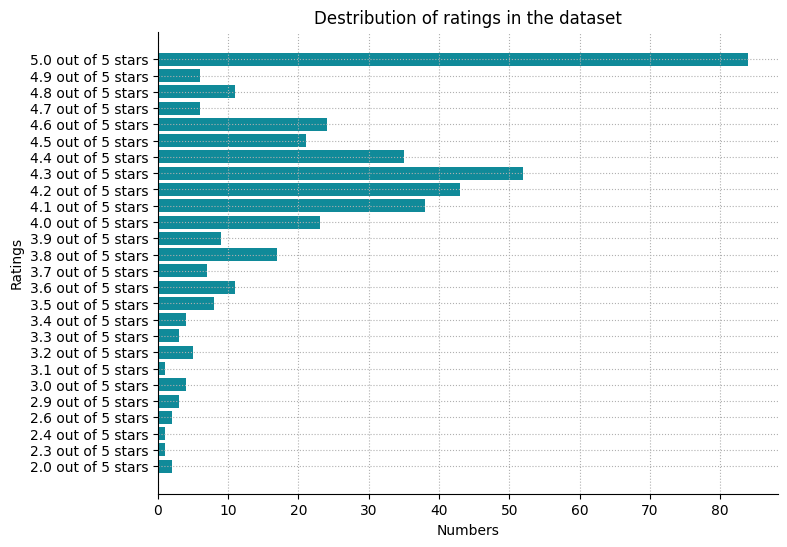

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Numbers')
plt.ylabel('Ratings')
plt.title('Destribution of ratings in the dataset')
x = df_rating['ratings']
y = df_rating['Number']
plt.grid(which='both', linestyle = ':')
plt.barh(x, y, color='#108A99')
sns.despine()
plt.show()


In [ ]:
df.head()

,Unnamed: 0,descriptions,ratings,nomber_of_ratings,prices
0,0,"Morostron 15.6"" Touch Screen Laptop 16GB RAM 1...",3.8 out of 5 stars,25,399.99
1,1,"Morostron 15.6"" Touch Screen Laptop 16GB RAM 1...",3.8 out of 5 stars,25,399.99
2,2,"Morostron Win11 Laptop computer, 15.6 Inch N50...",3.5 out of 5 stars,30,249.99
3,3,"Laptop, 8GB DDR4 256GB SSD Notebook, 17.3 Inch...",4.8 out of 5 stars,39,279.99
4,4,"15.6'' Laptop 12GB DDR4 512GB SSD, Windows 11 ...",5.0 out of 5 stars,26,239.99


In [ ]:
desc_list = df['descriptions'].to_list()

In [ ]:
desc = []

for description in desc_list:
     
    x = description.split(',')
    
    desc.append(x)


In [ ]:
print(desc)

[['Morostron 15.6" Touch Screen Laptop 16GB RAM 1TB SSD 1080P FHD', ' Win11 Quad-Core Processor', ' Full Metal Laptop with Backlit Keyboard & finger print Touch ID', ' AC WiFi', ' WPS', ' Mini HDMI', ' USB 3.0'], ['Morostron 15.6" Touch Screen Laptop 16GB RAM 1TB SSD 1080P FHD', ' Win11 Quad-Core Processor', ' Full Metal Laptop with Backlit Keyboard & finger print Touch ID', ' AC WiFi', ' WPS', ' Mini HDMI', ' USB 3.0'], ['Morostron Win11 Laptop computer', ' 15.6 Inch N5095 quad core 16GB RAM 512G SSD', ' FHD 1920 * 1080 IPS Display Notebook PC', ' Backlit keyboard', ' Finger print touch ID', ' AC wifi', 'All-Metal Body'], ['Laptop', ' 8GB DDR4 256GB SSD Notebook', ' 17.3 Inch Laptops Computer with Celeron Processor(up to 2.6 GHz)', ' 8000mAh', ' Webcam', ' Mini HDMI', ' USB3.2 * 2', ' Dual WiFi', ' Type-C(Slim)'], ["15.6'' Laptop 12GB DDR4 512GB SSD", ' Windows 11 Quad-Core Intel Celeron N5095 Processors', ' 1080P IPS FHD Display Laptop Computer', 'Numeric Keypad USB 3.0', ' Bluetooth

In [ ]:
laptop_name = []

for list in desc:

    nameoflaptop = list[0]
    
    laptop_name.append(nameoflaptop)

print(laptop_name,"\n",  len(laptop_name))

['Morostron 15.6" Touch Screen Laptop 16GB RAM 1TB SSD 1080P FHD', 'Morostron 15.6" Touch Screen Laptop 16GB RAM 1TB SSD 1080P FHD', 'Morostron Win11 Laptop computer', 'Laptop', "15.6'' Laptop 12GB DDR4 512GB SSD", '15.6" Windows 11 Pro Laptop', '17.3 inch Laptops', '14-inch Windows 11 Laptop', "15.6'' Laptop 16GB DDR4 512GB SSD", 'ACEMAGIC Laptop Computer 16 inch FHD Display', 'Lenovo IdeaPad 1 14 Laptop', 'HP Newest Pavilion 15.6" HD Touchscreen Anti-Glare Laptop', 'SGIN 17.3 inch Laptop', 'Laptop', 'Anna Bella 15.6“ Laptop Computer', 'ASUS Vivobook Go 15.6” Laptop', 'HP EliteBook 655 G10 15.6" FHD Business Laptop Computer', 'LENOVO IdeaPad 3i Laptop', 'HP Stream 14" HD BrightView Laptop', 'Lenovo IdeaPad 1 Laptop', 'Dell 2023 Newest Inspiron 15 3525 Laptop', 'HP 2024 Premium 14" Micro-Edge Portable Laptop Student Business', 'ACEMAGIC 2024 Newest Gaming Laptop with Backlit Keyboard', 'Lenovo Ideapad Laptop Touchscreen 15.6" FHD', 'HP 14"" Laptop Ultral Light for Students and Business

In [ ]:
len(laptop_name)

421

In [ ]:
lap_name = []
name_laptop = []

for l in laptop_name:

    y = l.split(' ')
     
    lap_name.append(y)

for x in lap_name:

    name_laptop.append(x[0])


print(lap_name, "\n", len(lap_name),"\n", name_laptop, "\n", len(name_laptop))

[['Morostron', '15.6"', 'Touch', 'Screen', 'Laptop', '16GB', 'RAM', '1TB', 'SSD', '1080P', 'FHD'], ['Morostron', '15.6"', 'Touch', 'Screen', 'Laptop', '16GB', 'RAM', '1TB', 'SSD', '1080P', 'FHD'], ['Morostron', 'Win11', 'Laptop', 'computer'], ['Laptop'], ["15.6''", 'Laptop', '12GB', 'DDR4', '512GB', 'SSD'], ['15.6"', 'Windows', '11', 'Pro', 'Laptop'], ['17.3', 'inch', 'Laptops'], ['14-inch', 'Windows', '11', 'Laptop'], ["15.6''", 'Laptop', '16GB', 'DDR4', '512GB', 'SSD'], ['ACEMAGIC', 'Laptop', 'Computer', '16', 'inch', 'FHD', 'Display'], ['Lenovo', 'IdeaPad', '1', '14', 'Laptop'], ['HP', 'Newest', 'Pavilion', '15.6"', 'HD', 'Touchscreen', 'Anti-Glare', 'Laptop'], ['SGIN', '17.3', 'inch', 'Laptop'], ['Laptop'], ['Anna', 'Bella', '15.6“', 'Laptop', 'Computer'], ['ASUS', 'Vivobook', 'Go', '15.6”', 'Laptop'], ['HP', 'EliteBook', '655', 'G10', '15.6"', 'FHD', 'Business', 'Laptop', 'Computer'], ['LENOVO', 'IdeaPad', '3i', 'Laptop'], ['HP', 'Stream', '14"', 'HD', 'BrightView', 'Laptop'], ['L

In [ ]:
x = []

for name in name_laptop:

    y = name.capitalize() 
    x.append(y)

print(x)


['Morostron', 'Morostron', 'Morostron', 'Laptop', "15.6''", '15.6"', '17.3', '14-inch', "15.6''", 'Acemagic', 'Lenovo', 'Hp', 'Sgin', 'Laptop', 'Anna', 'Asus', 'Hp', 'Lenovo', 'Hp', 'Lenovo', 'Dell', 'Hp', 'Acemagic', 'Lenovo', 'Hp', 'Gaming', 'Acemagic', 'Morostron', 'Morostron', 'Apolosign', 'Apolosign', '[electric', '[electric', 'Apolosign', 'Hp', 'Lenovo', 'Asus', 'Acer', 'Nimo', '15.6"', 'Jumper', 'Hp', 'Dell', 'Hp', 'Hp', '15.6', 'Laptop', '16', 'Asus', 'Acemagic', 'Asus', 'Lenovo', 'Acemagic', 'Dell', 'Hp', 'Laptop', 'Hp', 'Hp', 'Tesmart', '2024', 'Hp', 'Sgin', 'Lenovo', 'Samsung', 'Dell', 'Hp', 'Lenovo', 'Hp', 'Hp', 'Lenovo', 'Sgin', 'Samsung', 'Lenovo', 'Dell', 'Laptop', 'Hp', 'Jumper', 'Lenovo', 'Asus', 'Lenovo', 'Lenovo', 'Acer', 'Asus', 'Asus', 'Hp', 'Hp', 'Lg', 'Netum', 'Netum', 'Dell', 'Hp', 'Hp', 'Hp', 'Hp', 'Lenovo', 'Hp', 'Asus', 'Acer', 'Acemagic', 'Dell', 'Samsung', '15.6', 'Hp', 'Asus', 'Lenovo', 'Acer', 'Dell', 'Lenovo', 'Jumper', 'Lenovo', 'Hp', 'Hp', 'Msi', '14"'

In [ ]:
df['laptop_name'] = x

In [ ]:
df.head()

,Unnamed: 0,descriptions,ratings,nomber_of_ratings,prices,laptop_name
0,0,"Morostron 15.6"" Touch Screen Laptop 16GB RAM 1...",3.8 out of 5 stars,25,399.99,Morostron
1,1,"Morostron 15.6"" Touch Screen Laptop 16GB RAM 1...",3.8 out of 5 stars,25,399.99,Morostron
2,2,"Morostron Win11 Laptop computer, 15.6 Inch N50...",3.5 out of 5 stars,30,249.99,Morostron
3,3,"Laptop, 8GB DDR4 256GB SSD Notebook, 17.3 Inch...",4.8 out of 5 stars,39,279.99,Laptop
4,4,"15.6'' Laptop 12GB DDR4 512GB SSD, Windows 11 ...",5.0 out of 5 stars,26,239.99,15.6''


In [ ]:
df.isnull().sum()

Unnamed: 0           0
descriptions         0
ratings              0
nomber_of_ratings    0
prices               0
laptop_name          0
dtype: int64

In [ ]:
df_lapname = df.groupby('laptop_name').size().reset_index(name = 'Number')
df_lapname

,laptop_name,Number
0,"10.1""",1
1,135w,3
2,14,3
3,"14""",1
4,14-inch,1
...,...,...
66,Visiontek,4
67,Windows,1
68,X1,2
69,[electric,2


In [ ]:
df_lapname[df_lapname['Number'] > 4]

,laptop_name,Number
7,15.6'',7
9,16,8
13,180w,12
17,20v,5
18,230w,5
19,240w,6
22,Acemagic,14
23,Acer,30
29,Apolosign,7
31,Asus,50


In [ ]:
for brand in x:
    
    if brand != 'Acer' and brand != 'Asus' and brand != 'Dell' and brand != 'Hp' and brand != 'Lenovo' and brand != 'Msi':

        df = df.drop(df[df['laptop_name'] == brand].index) 

df.shape

(216, 6)

In [ ]:
df.head()

,Unnamed: 0,descriptions,ratings,nomber_of_ratings,prices,laptop_name
10,10,"Lenovo IdeaPad 1 14 Laptop, 14.0"" HD Display, ...",3.7 out of 5 stars,636,158.98,Lenovo
11,11,"HP Newest Pavilion 15.6"" HD Touchscreen Anti-G...",4.2 out of 5 stars,561,411.99,Hp
15,15,"ASUS Vivobook Go 15.6” Laptop, AMD Ryzen 5 752...",4.4 out of 5 stars,96,380.44,Asus
16,16,"HP EliteBook 655 G10 15.6"" FHD Business Laptop...",5.0 out of 5 stars,1,589.00,Hp
17,17,"LENOVO IdeaPad 3i Laptop, 15.6"" HD Touchscreen...",4.3 out of 5 stars,480,349.39,Lenovo


In [ ]:
#df = df.drop(["Unnamed: 0"], axis=1)

In [ ]:
df.shape

(216, 6)

In [ ]:
desc_list = df["descriptions"].to_list()

In [ ]:
desc = []

for description in desc_list:
     
    x = description.split(',')
    
    desc.append(x)


In [ ]:
print(desc)

[['Lenovo IdeaPad 1 14 Laptop', ' 14.0" HD Display', ' Intel Celeron N4020', ' 4GB RAM', ' 64GB Storage', ' Intel UHD Graphics 600', ' Win 11 in S Mode', ' Cloud Grey'], ['HP Newest Pavilion 15.6" HD Touchscreen Anti-Glare Laptop', ' 16GB RAM', ' 1TB SSD Storage', ' Intel Core Processor up to 4.1GHz', ' Up to 11 Hours Long Battery Life', ' Type-C', ' HDMI', ' Windows 11 Home', ' Silver'], ['ASUS Vivobook Go 15.6” Laptop', ' AMD Ryzen 5 7520U', ' 8GB', ' 512GB', ' Windows 11 Home', ' Cool Silver', ' E1504FA-AS54'], ['HP EliteBook 655 G10 15.6" FHD Business Laptop Computer', ' Hexa-Core AMD Ryzen 5 7530U (Beat i7-1355U)', ' 32GB DDR4 RAM', ' 1TB PCIe SSD', ' WiFi 6E', ' Bluetooth 5.3', ' Fingerprint Reader', ' Windows 11 Pro', ' Tilsiy'], ['LENOVO IdeaPad 3i Laptop', ' 15.6" HD Touchscreen Display', ' Intel Core i3-1115G4 Processor', ' 12GB DDR4 RAM', ' 256GB PCIe SSD', ' Bluetooth', ' Webcam', ' Wi-Fi 6', ' HDMI', ' Windows 11 Home', ' Grey'], ['HP Stream 14" HD BrightView Laptop', ' In

In [ ]:
import pandas as pd
import re

# Load the data from the CSV file
##file_path = r'C:\Users\t480\Desktop\datavis project\colected_data3.csv'
#data = pd.read_csv(file_path)

# Function to extract AMD Ryzen information
def extract_amd_ryzen(description):
    description = str(description) if description is not None else ''
    processor = re.search(r'\bAMD Ryzen [3-9] \d{4}[UHX]?\b', description)
    return processor.group() if processor else None

# Function to extract Intel information
def extract_intel(description):
    description = str(description) if description is not None else ''
    #processor = re.search(r'\bIntel (Core i[3579]|Celeron|Pentium|Xeon) [^\s]+ Processor\b', description)
    processor = re.search(r'\bIntel .+? Processor\b|\bIntel .+?\b', description)
    return processor.group() if processor else None

# Function to extract RAM, Storage, and Screen Format
def extract_other_info(description):
    description = str(description) if description is not None else ''
    ram = re.search(r'\b\d+GB RAM\b|\b\d+GB\b', description)
    storage = re.search(r'\b\d+\s?GB SSD\b|\b\d+\s?TB SSD\b|\b\d+\s?GB HDD\b|\b\d+\s?TB HDD\b', description)
    screen_format = re.search(r'\b\d+(\.\d+)?["”-]?\s?(FHD|HD|UHD|4K|Display)?\b', description)
    
    screen_format_normalized = screen_format.group() if screen_format else None
    if screen_format_normalized:
        screen_format_normalized = screen_format_normalized.replace('FHD', '').replace('HD', '').replace('"', '').replace(" ", "").replace('"HD', "").replace('”', "")
    
    ram_normalized = ram.group() if ram else None
    if ram_normalized:
        ram_normalized = ram_normalized.replace('RAM', "")

    return {
        'RAM': ram_normalized,
        'Storage': storage.group() if storage else None,
        'Screen Format': screen_format_normalized
    }

# Extracting information from each description
extracted_data = []
for desc in df['descriptions']:
    amd_processor = extract_amd_ryzen(desc)
    intel_processor = extract_intel(desc)
    other_info = extract_other_info(desc)
    
    extracted_data.append({
        'RAM': other_info['RAM'],
        'Storage': other_info['Storage'],
        'Processor': amd_processor if amd_processor else intel_processor,
        'Screen Format': other_info['Screen Format']
    })

# Creating a DataFrame with the extracted information
extracted_df = pd.DataFrame(extracted_data)

# Display the extracted DataFrame
extracted_df


,RAM,Storage,Processor,Screen Format
0,4GB,None,Intel Celeron,1
1,16GB,1TB SSD,Intel Core Processor,15.6
2,8GB,None,AMD Ryzen 5 7520U,15.6
3,32GB,None,AMD Ryzen 5 7530U,655
4,12GB,None,Intel Core i3-1115G4 Processor,15.6
...,...,...,...,...
211,32GB,None,AMD Ryzen 5 5500U,17.3
212,16GB,1TB SSD,AMD Ryzen 7 6800H,5
213,32GB,None,Intel Core,17
214,64GB,2TB SSD,Intel Core,16


In [ ]:
extracted_df.isnull().sum()

RAM                6
Storage          140
Processor         53
Screen Format      0
dtype: int64

In [ ]:
ds = pd.concat([df, extracted_df], axis=1)

In [ ]:
ds

,Unnamed: 0,descriptions,ratings,nomber_of_ratings,prices,laptop_name,RAM,Storage,Processor,Screen Format
10,10.0,"Lenovo IdeaPad 1 14 Laptop, 14.0"" HD Display, ...",3.7 out of 5 stars,636,158.98,Lenovo,16GB,None,Intel Celeron Processor,14
11,11.0,"HP Newest Pavilion 15.6"" HD Touchscreen Anti-G...",4.2 out of 5 stars,561,411.99,Hp,16GB,256GB SSD,Intel Core Processor,15.6
15,15.0,"ASUS Vivobook Go 15.6” Laptop, AMD Ryzen 5 752...",4.4 out of 5 stars,96,380.44,Asus,16GB,1TB SSD,None,2023
16,16.0,"HP EliteBook 655 G10 15.6"" FHD Business Laptop...",5.0 out of 5 stars,1,589.00,Hp,32GB,1TB SSD,Intel Core,15
17,17.0,"LENOVO IdeaPad 3i Laptop, 15.6"" HD Touchscreen...",4.3 out of 5 stars,480,349.39,Lenovo,16GB,None,Intel N4120,14
...,...,...,...,...,...,...,...,...,...,...
207,NaN,NaN,NaN,NaN,NaN,NaN,16GB,1TB SSD,None,15.6
208,NaN,NaN,NaN,NaN,NaN,NaN,64GB,4TB SSD,Intel Core,16
209,NaN,NaN,NaN,NaN,NaN,NaN,32GB,None,None,16
210,NaN,NaN,NaN,NaN,NaN,NaN,40GB,1TB SSD,None,2023


In [ ]:
ds.isnull().sum()

Unnamed: 0            98
descriptions          98
ratings               98
nomber_of_ratings     98
prices                98
laptop_name           98
RAM                  104
Storage              238
Processor            151
Screen Format         98
dtype: int64

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 10 to 215
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         216 non-null    float64
 1   descriptions       216 non-null    object 
 2   ratings            216 non-null    object 
 3   nomber_of_ratings  216 non-null    object 
 4   prices             216 non-null    object 
 5   laptop_name        216 non-null    object 
 6   RAM                210 non-null    object 
 7   Storage            76 non-null     object 
 8   Processor          163 non-null    object 
 9   Screen Format      216 non-null    object 
dtypes: float64(1), object(9)
memory usage: 27.0+ KB


In [ ]:
ds= ds.drop(ds[ds['RAM'] == None].index)

In [ ]:
ds.shape

(314, 10)

In [ ]:
ds.isnull().sum()

Unnamed: 0            98
descriptions          98
ratings               98
nomber_of_ratings     98
prices                98
laptop_name           98
RAM                  104
Storage              238
Processor            151
Screen Format         98
dtype: int64

In [ ]:
newds = ds.dropna(axis=0)

In [ ]:
newds.shape

(33, 10)

In [ ]:
newds.isnull().sum()

Unnamed: 0           0
descriptions         0
ratings              0
nomber_of_ratings    0
prices               0
laptop_name          0
RAM                  0
Storage              0
Processor            0
Screen Format        0
dtype: int64

In [ ]:
newds.head()

,Unnamed: 0,descriptions,ratings,nomber_of_ratings,prices,laptop_name,RAM,Storage,Processor,Screen Format
11,11.0,"HP Newest Pavilion 15.6"" HD Touchscreen Anti-G...",4.2 out of 5 stars,561,411.99,Hp,16GB,256GB SSD,Intel Core Processor,15.6
16,16.0,"HP EliteBook 655 G10 15.6"" FHD Business Laptop...",5.0 out of 5 stars,1,589.00,Hp,32GB,1TB SSD,Intel Core,15
21,21.0,"HP 2024 Premium 14"" Micro-Edge Portable Laptop...",4.2 out of 5 stars,8,249.00,Hp,24GB,1TB SSD,Intel Core,3
23,23.0,"Lenovo Ideapad Laptop Touchscreen 15.6"" FHD, I...",5.0 out of 5 stars,4,429.00,Lenovo,32GB,1TB SSD,Intel Core,2023
24,24.0,"HP 14"""" Laptop Ultral Light for Students and B...",4.2 out of 5 stars,508,264.24,Hp,16GB,1TB SSD,AMD Ryzen 3 5300U,14-


In [ ]:
newds = newds.drop(['Unnamed: 0'], axis=1)

In [ ]:
newds.head()

,descriptions,ratings,nomber_of_ratings,prices,laptop_name,RAM,Storage,Processor,Screen Format
11,"HP Newest Pavilion 15.6"" HD Touchscreen Anti-G...",4.2 out of 5 stars,561,411.99,Hp,16GB,256GB SSD,Intel Core Processor,15.6
16,"HP EliteBook 655 G10 15.6"" FHD Business Laptop...",5.0 out of 5 stars,1,589.00,Hp,32GB,1TB SSD,Intel Core,15
21,"HP 2024 Premium 14"" Micro-Edge Portable Laptop...",4.2 out of 5 stars,8,249.00,Hp,24GB,1TB SSD,Intel Core,3
23,"Lenovo Ideapad Laptop Touchscreen 15.6"" FHD, I...",5.0 out of 5 stars,4,429.00,Lenovo,32GB,1TB SSD,Intel Core,2023
24,"HP 14"""" Laptop Ultral Light for Students and B...",4.2 out of 5 stars,508,264.24,Hp,16GB,1TB SSD,AMD Ryzen 3 5300U,14-


In [ ]:
newds.to_csv("preclean_data6.csv")